In [1]:
%pylab inline
import time

import pandas as pd
import anndata

import torch

from scvi.dataset import AnnDatasetFromAnnData
from scvi.models import LDVAE
from scvi.inference import UnsupervisedTrainer
from scvi.inference.posterior import Posterior

Populating the interactive namespace from numpy and matplotlib


[2019-12-29 22:27:51,204] INFO - scvi._settings | Added StreamHandler with custom formatter to 'scvi' logger.
C:\Users\vale\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:21: DeprecationWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


In [2]:
adata = anndata.read('pijuan_sala_atlas.h5ad')

In [3]:
idx = adata.obs.query('not doublet').index
# idx = np.random.choice(idx, 20000, replace=False)
adata = adata[idx]

In [4]:
adata.X.getnnz() / (adata.X.shape[0] * adata.X.shape[1])

0.1144419646406324

In [4]:
cell_numbers = [2500 * 2 ** i for i in range(10)] + [idx.shape[0]]

In [5]:
s_adata = adata[idx]

In [8]:
cells_dataset = AnnDatasetFromAnnData(adata)

[2019-11-09 19:47:36,578] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
[2019-11-09 19:47:36,583] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
[2019-11-09 19:47:38,454] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2019-11-09 19:47:43,237] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells


In [9]:
def create_dataset():
    cells_dataset = \
    cells_dataset = AnnDatasetFromAnnData(adata)
    return cells_dataset

In [10]:
inference_times = []
train_histories = []
for n_cells in cell_numbers:
    cells_dataset = create_dataset()
    cells_dataset.subsample_cells(n_cells)
    cells_dataset.subsample_genes(1000)
    
    vae = LDVAE(
        cells_dataset.nb_genes,
        reconstruction_loss='nb',
        use_batch_norm=True,
        latent_distribution='normal',
        n_latent=20
    )
    
    trainer = UnsupervisedTrainer(vae,
                              cells_dataset,
                              frequency=1,
                              use_cuda=True
                             )
    
    t0 = time.time()
    trainer.train(n_epochs=10)
    t = time.time() - t0
    
    inference_times.append(t)
    train_histories.append(trainer.history['ll_train_set'])
    

[2019-11-09 19:49:16,740] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
[2019-11-09 19:49:16,745] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
[2019-11-09 19:49:18,568] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2019-11-09 19:49:22,490] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
[2019-11-09 19:49:23,921] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2019-11-09 19:49:23,998] INFO - scvi.dataset.dataset | Downsampled from 125775 to 2500 cells
[2019-11-09 19:49:24,352] INFO - scvi.dataset.dataset | Downsampling from 29452 to 1000 genes
[2019-11-09 19:49:24,416] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2019-11-09 19:49:24,444] INFO - scvi.dataset.dataset | Filtering non-expressing cells.
[2019-11-09 19:49:24,471] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2019-11-09 19:49:24,487] INFO - scvi.dataset.dataset | D

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.72it/s]


[2019-11-09 19:49:38,746] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 19:49:38,752] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 19:49:40,874] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 19:49:43,450] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 19:49:44,660] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 19:49:44,801] INFO - scvi.dataset.dataset | Downsampled from 125775 to 5000 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 5000 cells
[2019-11-09 19:49:45,408] INFO - scvi.dataset.dataset | Do

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:10<00:00,  1.10s/it]


[2019-11-09 19:49:59,893] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 19:49:59,899] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 19:50:01,838] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 19:50:04,010] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 19:50:05,303] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 19:50:05,586] INFO - scvi.dataset.dataset | Downsampled from 125775 to 10000 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 10000 cells
[2019-11-09 19:50:06,706] INFO - scvi.dataset.dataset | 

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.15s/it]


[2019-11-09 19:50:32,162] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 19:50:32,168] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 19:50:34,060] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 19:50:36,230] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 19:50:37,632] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 19:50:38,119] INFO - scvi.dataset.dataset | Downsampled from 125775 to 20000 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 20000 cells
[2019-11-09 19:50:40,108] INFO - scvi.dataset.dataset | 

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.26s/it]


[2019-11-09 19:51:27,493] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 19:51:27,499] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 19:51:29,472] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 19:51:31,749] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 19:51:33,450] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 19:51:34,367] INFO - scvi.dataset.dataset | Downsampled from 125775 to 40000 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 40000 cells
[2019-11-09 19:51:38,054] INFO - scvi.dataset.dataset | 

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [01:24<00:00,  8.48s/it]


[2019-11-09 19:53:09,522] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 19:53:09,529] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 19:53:11,435] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 19:53:13,513] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 19:53:15,818] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 19:53:17,442] INFO - scvi.dataset.dataset | Downsampled from 125775 to 80000 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 80000 cells
[2019-11-09 19:53:24,298] INFO - scvi.dataset.dataset | 

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [02:51<00:00, 17.12s/it]


[2019-11-09 19:56:26,001] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 19:56:26,007] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 19:56:28,138] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 19:56:30,855] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 19:56:33,806] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 19:56:36,141] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 19:56:46,819] INFO - scvi.dataset.dataset 

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [04:24<00:00, 26.43s/it]


[2019-11-09 20:01:25,890] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 20:01:25,897] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 20:01:27,853] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:01:30,116] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 20:01:32,867] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:01:35,155] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 20:01:44,609] INFO - scvi.dataset.dataset 

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [04:23<00:00, 26.35s/it]


[2019-11-09 20:06:22,794] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 20:06:22,808] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 20:06:24,735] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:06:27,042] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 20:06:29,830] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:06:32,141] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 20:06:41,520] INFO - scvi.dataset.dataset 

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [04:25<00:00, 26.58s/it]


[2019-11-09 20:11:21,604] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 20:11:21,610] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 20:11:23,537] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:11:25,837] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 20:11:28,563] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:11:30,825] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 20:11:40,146] INFO - scvi.dataset.dataset 

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [04:20<00:00, 26.03s/it]


[2019-11-09 20:16:15,551] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 20:16:15,557] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 20:16:17,492] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:16:19,766] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 20:16:22,582] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:16:24,915] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 20:16:34,212] INFO - scvi.dataset.dataset 

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [04:24<00:00, 26.43s/it]


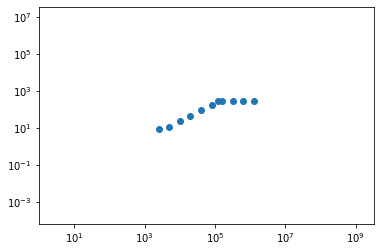

In [11]:
plt.loglog()
plt.scatter(cell_numbers, inference_times);

In [13]:
trainer.history

defaultdict(list,
            {'elbo_train_set': [81897.05822276883,
              4508.622188680183,
              3674.6877555251194,
              3789.3990809714146,
              3866.9711167325086,
              3048.2260792849956,
              2983.1475761994384,
              3062.4736095970607,
              2751.72333361285,
              2744.577954339346,
              2530.8334124521716],
             'elbo_test_set': [82012.52792685351,
              4511.964639236732,
              3681.7613160902406,
              3794.8501652256014,
              3875.832426455973,
              3049.7012932319617,
              2989.522396143908,
              3061.631794126416,
              2753.1692618266748,
              2743.72459625323,
              2533.8772237129797],
             'll_train_set': []})

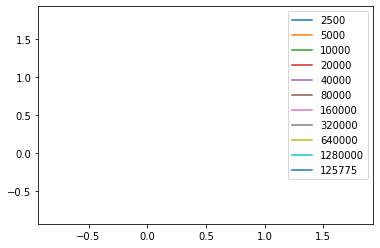

In [14]:
for n, th in zip(cell_numbers, train_histories):
    plt.plot(th, label=n)
    
plt.legend();

In [16]:
inference_times_cpu = []
train_histories_cpu = []
for n_cells in cell_numbers:
    cells_dataset = create_dataset()
    cells_dataset.subsample_cells(n_cells)
    cells_dataset.subsample_genes(1000)
    
    vae = LDVAE(
        cells_dataset.nb_genes,
        reconstruction_loss='nb',
        use_batch_norm=True,
        latent_distribution='normal',
        n_latent=20
    )
    
    trainer = UnsupervisedTrainer(vae,
                              cells_dataset,
                              frequency=1,
                              use_cuda=False
                             )
    
    t0 = time.time()
    trainer.train(n_epochs=10)
    t = time.time() - t0
    
    train_histories_cpu.append(trainer.history['elbo_train_set'])
    inference_times_cpu.append(t)
    

[2019-11-09 20:25:14,801] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 20:25:14,807] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 20:25:16,736] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:25:19,031] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 20:25:20,171] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:25:20,248] INFO - scvi.dataset.dataset | Downsampled from 125775 to 2500 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 2500 cells
[2019-11-09 20:25:20,578] INFO - scvi.dataset.dataset | Do

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.21it/s]


[2019-11-09 20:25:32,141] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 20:25:32,155] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 20:25:34,119] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:25:36,379] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 20:25:37,596] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:25:37,760] INFO - scvi.dataset.dataset | Downsampled from 125775 to 5000 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 5000 cells
[2019-11-09 20:25:38,408] INFO - scvi.dataset.dataset | Do

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:16<00:00,  1.62s/it]


[2019-11-09 20:25:58,077] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 20:25:58,091] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 20:26:00,033] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:26:02,351] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 20:26:03,626] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:26:03,894] INFO - scvi.dataset.dataset | Downsampled from 125775 to 10000 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 10000 cells
[2019-11-09 20:26:04,989] INFO - scvi.dataset.dataset | 

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:31<00:00,  3.13s/it]


[2019-11-09 20:26:40,339] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 20:26:40,345] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 20:26:42,269] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:26:44,528] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 20:26:45,963] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:26:46,460] INFO - scvi.dataset.dataset | Downsampled from 125775 to 20000 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 20000 cells
[2019-11-09 20:26:48,487] INFO - scvi.dataset.dataset | 

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [01:02<00:00,  6.20s/it]


[2019-11-09 20:27:55,723] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 20:27:55,735] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 20:27:57,631] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:27:59,928] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 20:28:01,722] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:28:02,640] INFO - scvi.dataset.dataset | Downsampled from 125775 to 40000 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 40000 cells
[2019-11-09 20:28:06,334] INFO - scvi.dataset.dataset | 

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [02:02<00:00, 12.21s/it]


[2019-11-09 20:30:15,848] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 20:30:15,854] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 20:30:17,779] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:30:20,053] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 20:30:22,353] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:30:24,024] INFO - scvi.dataset.dataset | Downsampled from 125775 to 80000 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 80000 cells
[2019-11-09 20:30:30,746] INFO - scvi.dataset.dataset | 

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [04:06<00:00, 24.62s/it]


[2019-11-09 20:34:49,015] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 20:34:49,021] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 20:34:50,983] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:34:53,294] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 20:34:56,069] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:34:58,365] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 20:35:07,782] INFO - scvi.dataset.dataset 

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [06:34<00:00, 39.41s/it]


[2019-11-09 20:41:59,274] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 20:41:59,280] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 20:42:01,220] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:42:03,480] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 20:42:06,271] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:42:08,549] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 20:42:18,081] INFO - scvi.dataset.dataset 

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [06:29<00:00, 38.97s/it]


[2019-11-09 20:49:04,942] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 20:49:04,948] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 20:49:06,870] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:49:09,131] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 20:49:11,902] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:49:14,172] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 20:49:23,466] INFO - scvi.dataset.dataset 

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [06:30<00:00, 39.02s/it]


[2019-11-09 20:56:10,633] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 20:56:10,640] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 20:56:12,591] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:56:14,884] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 20:56:17,652] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 20:56:19,967] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 20:56:29,215] INFO - scvi.dataset.dataset 

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [06:33<00:00, 39.40s/it]


[2019-11-09 21:03:20,718] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 21:03:20,729] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 21:03:22,650] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 21:03:24,915] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 21:03:27,699] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 21:03:30,005] INFO - scvi.dataset.dataset | Downsampled from 125775 to 125775 cells
INFO:scvi.dataset.dataset:Downsampled from 125775 to 125775 cells
[2019-11-09 21:03:39,316] INFO - scvi.dataset.dataset 

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [06:30<00:00, 39.06s/it]


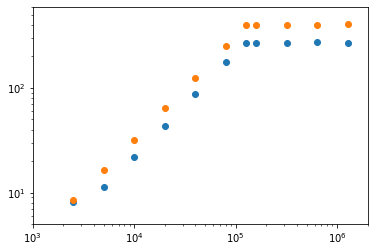

In [31]:
plt.loglog()
plt.scatter(cell_numbers, inference_times);
plt.scatter(cell_numbers, inference_times_cpu);
plt.ylim(bottom=5e0, top=6e2)
plt.xlim(left=1e3, right=2e6);

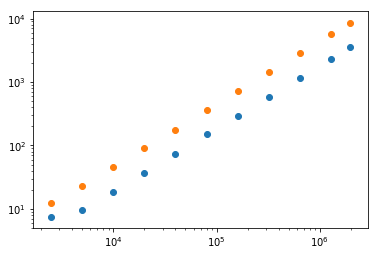

In [12]:
plt.loglog()
plt.scatter(cell_numbers, inference_times);
plt.scatter(cell_numbers, inference_times_cpu);

In [18]:
infer_time_df = \
pd.DataFrame({'cell_numbers': cell_numbers,
              'gpu_inference_time': inference_times,
              'cpu_inference_time': inference_times_cpu})

In [19]:
infer_time_df.to_csv('pij_linear_inference_times.csv')

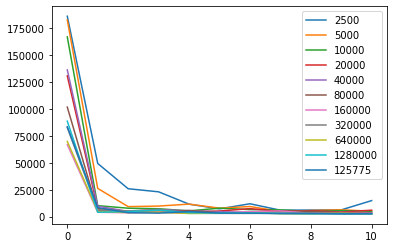

In [21]:
for n, th in zip(cell_numbers, train_histories_cpu):
    plt.plot(th, label=n)
    
plt.legend();

In [22]:
train_h_df = pd.DataFrame(np.array(train_histories), index=cell_numbers)

In [23]:
train_h_df.to_csv('pij_linear_train_history.csv')